In [1]:
import pandas as pd

In [2]:
def load_dataset(filename, github_raw_url="https://raw.githubusercontent.com/Statsomat/Datasets/master/data-ml/"):
    """
    Load a dataset from the course GitHub repository.

    Parameters:
    -----------
    filename : str
        Name of the CSV file (e.g., 'sales.csv')
    github_raw_url : str
        Raw GitHub URL to the data directory. Students shouldn't change this.

    Returns:
    --------
    pandas.DataFrame
        The loaded dataset
    """
    full_url = f"{github_raw_url}{filename}"
    return pd.read_csv(full_url, header=None)

In [4]:
# Load dataset
df = load_dataset('spamdata.csv')
df.shape

(4601, 1)

In [5]:
df.head()

,0
0,0 0.64 0.64 0 0.32 0 0 0 0 0 0 0.64 0 0 0 0.32...
1,0.21 0.28 0.5 0 0.14 0.28 0.21 0.07 0 0.94 0.2...
2,0.06 0 0.71 0 1.23 0.19 0.19 0.12 0.64 0.25 0....
3,0 0 0 0 0.63 0 0.31 0.63 0.31 0.63 0.31 0.31 0...
4,0 0 0 0 0.63 0 0.31 0.63 0.31 0.63 0.31 0.31 0...


In [6]:
# Prepare dataset
# Create a function to process each row
def process_row(row_str):
    # Split the string by spaces
    values = row_str.iloc[0].split(' ')
    return pd.Series(values)

# Apply the function to each row in the dataframe
df = df.apply(process_row, axis=1)


In [7]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0,0.64,0.64,0,0.32,0,0,0,0,0,...,0,0,0,0.778,0,0,3.756,61,278,1
1,0.21,0.28,0.5,0,0.14,0.28,0.21,0.07,0,0.94,...,0,0.132,0,0.372,0.18,0.048,5.114,101,1028,1
2,0.06,0,0.71,0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0,0.276,0.184,0.01,9.821,485,2259,1
3,0,0,0,0,0.63,0,0.31,0.63,0.31,0.63,...,0,0.137,0,0.137,0,0,3.537,40,191,1
4,0,0,0,0,0.63,0,0.31,0.63,0.31,0.63,...,0,0.135,0,0.135,0,0,3.537,40,191,1


In [9]:
pip install dtreeviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 2.3 MB/s eta 0:00:00


In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import dtreeviz

# Create column names based on attribute information
# Word frequency columns (0-47)
word_freq_cols = [
    'word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our',
    'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail',
    'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses',
    'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit',
    'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp',
    'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs',
    'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
    'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct',
    'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re',
    'word_freq_edu', 'word_freq_table', 'word_freq_conference'
]

# Character frequency columns (48-53)
char_freq_cols = [
    'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#'
]

# Capital run length columns (54-56)
capital_run_length_cols = [
    'capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total'
]

# Target column (57)
target_col = ['spam']

# Combine all column names
column_names = word_freq_cols + char_freq_cols + capital_run_length_cols + target_col

# Apply column names to the dataframe
df.columns = column_names

# Display basic information about the dataframe
print(df.head())

  word_freq_make word_freq_address word_freq_all word_freq_3d word_freq_our  \
0              0              0.64          0.64            0          0.32   
1           0.21              0.28           0.5            0          0.14   
2           0.06                 0          0.71            0          1.23   
3              0                 0             0            0          0.63   
4              0                 0             0            0          0.63   

  word_freq_over word_freq_remove word_freq_internet word_freq_order  \
0              0                0                  0               0   
1           0.28             0.21               0.07               0   
2           0.19             0.19               0.12            0.64   
3              0             0.31               0.63            0.31   
4              0             0.31               0.63            0.31   

  word_freq_mail  ... char_freq_; char_freq_( char_freq_[ char_freq_!  \
0              0  .

In [8]:
df.shape

(4601, 58)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   word_freq_make              4601 non-null   object
 1   word_freq_address           4601 non-null   object
 2   word_freq_all               4601 non-null   object
 3   word_freq_3d                4601 non-null   object
 4   word_freq_our               4601 non-null   object
 5   word_freq_over              4601 non-null   object
 6   word_freq_remove            4601 non-null   object
 7   word_freq_internet          4601 non-null   object
 8   word_freq_order             4601 non-null   object
 9   word_freq_mail              4601 non-null   object
 10  word_freq_receive           4601 non-null   object
 11  word_freq_will              4601 non-null   object
 12  word_freq_people            4601 non-null   object
 13  word_freq_report            4601 non-null   obje

In [10]:
# Convert all columns to appropriate numeric types
for column in df.columns:
    df[column] = pd.to_numeric(df[column])

In [11]:
# EDA of target
print(df['spam'].value_counts())
print(f"Percentage of spam emails: {df['spam'].mean() * 100:.2f}%")

spam
0    2788
1    1813
Name: count, dtype: int64
Percentage of spam emails: 39.40%


In [13]:
# Prepare data for ML with sklearn
X = df.drop('spam', axis=1)
y = df['spam'] # ground truth
class_names = ['non-spam','spam']
features = column_names

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
# Create and train the Decision Tree Classifier
dtc_spam = DecisionTreeClassifier(criterion='gini',
                                 splitter='best',
                                 max_depth=8,
                                 min_samples_split=2,
                                 min_samples_leaf=10,
                                 min_weight_fraction_leaf=0.0,
                                 max_features=None,
                                 random_state=123,
                                 max_leaf_nodes=None,
                                 min_impurity_decrease=0.0,
                                 class_weight=None,
                                 ccp_alpha=0.00)
dtc_spam.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,8
,min_samples_split,2
,min_samples_leaf,10
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,123
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [15]:
import logging
logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)
logging.getLogger('matplotlib.axes._base').setLevel(logging.ERROR)

In [16]:
viz_model = dtreeviz.model(dtc_spam,
                           X_train=X_train, y_train=y_train,
                           feature_names=features,
                           target_name='iris',
                           class_names=class_names)

c:\Users\behro\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


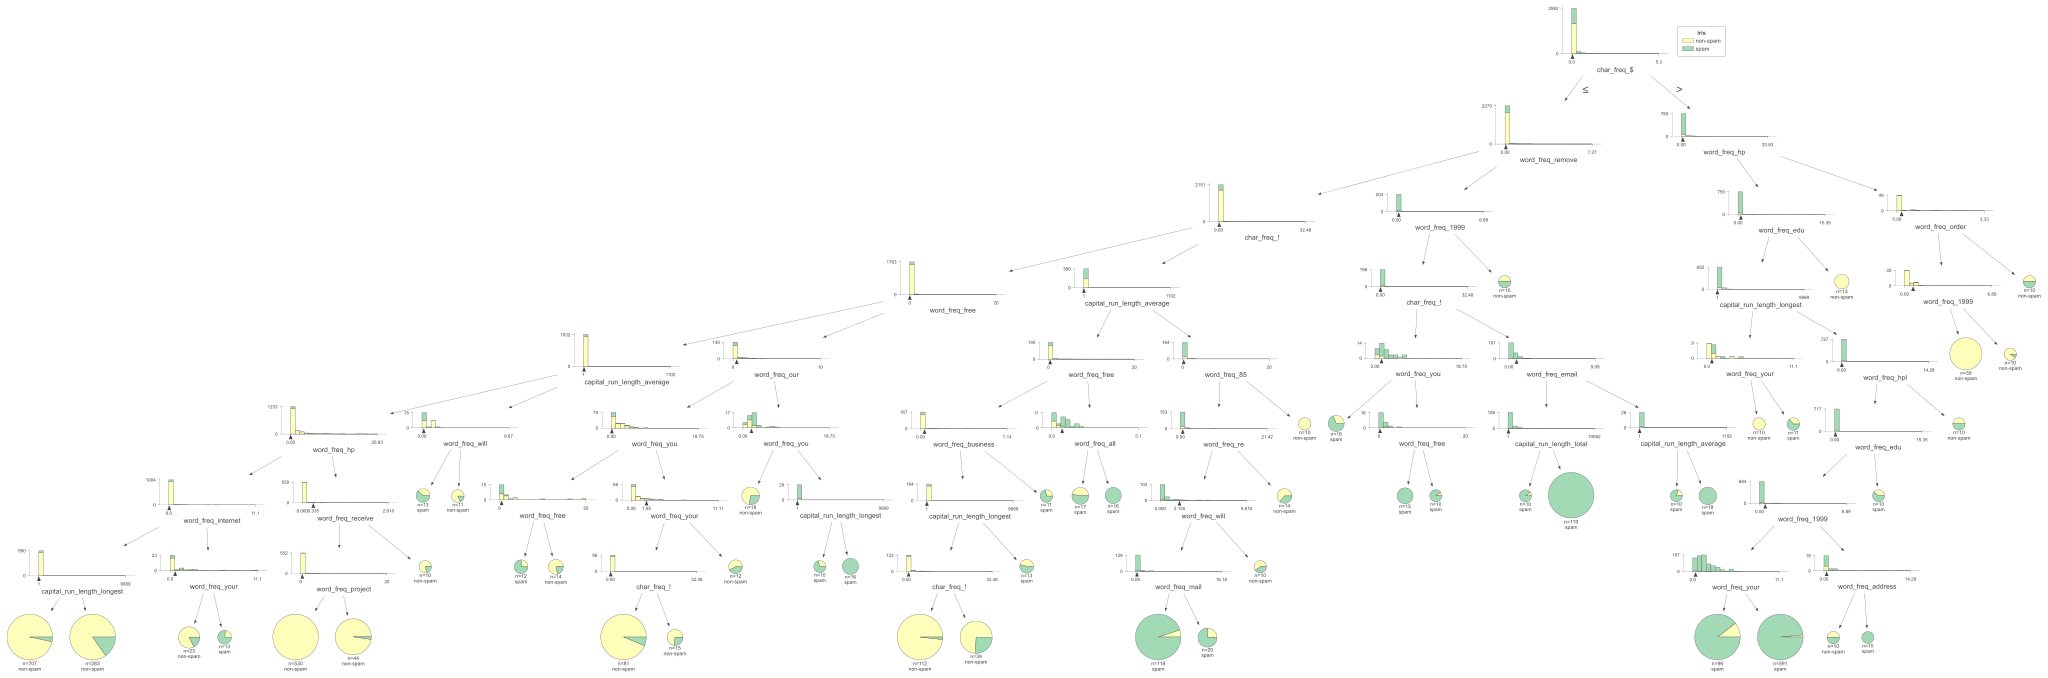

In [17]:
viz_model.view(scale=0.8)

In [18]:
# Make predictions on the test set
y_pred = dtc_spam.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 1, 0], shape=(1381,))

In [19]:
# Calculate accuracy on test dataset
accuracy = accuracy_score(y_test, y_pred) # Accuracy = (Number of correct predictions) / (Total number of predictions)
print(f"Accuracy: {accuracy:.4f}")

# Calculate additional metrics
# Precision = TP / (TP + FP), accuracy of positive predictions
# Recall = TP / (TP + FN). sensitivity
# F1 = 2 × (Precision × Recall) / (Precision + Recall), harmonic mean of precision and recall, providing a balance
print("\nClassification Report Test Dataset:")
print(classification_report(y_test, y_pred, target_names=class_names))

print("\nConfusion Matrix Test Dataset:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8899

Classification Report Test Dataset:
              precision    recall  f1-score   support

    non-spam       0.88      0.93      0.91       804
        spam       0.90      0.83      0.86       577

    accuracy                           0.89      1381
   macro avg       0.89      0.88      0.89      1381
weighted avg       0.89      0.89      0.89      1381


Confusion Matrix Test Dataset:
[[750  54]
 [ 98 479]]


In [20]:
# ROC Curve
from sklearn.metrics import roc_curve, auc, accuracy_score, classification_report, confusion_matrix

# You already have:
# y_pred = dtc_spam.predict(X_test)

# For ROC curve, we need probability scores
y_scores = dtc_spam.predict_proba(X_test)[:, 1]  # Get probability of positive class (spam)
y_scores

array([0.03253182, 0.0617284 , 0.        , ..., 1.        , 0.52941176,
       0.        ], shape=(1381,))

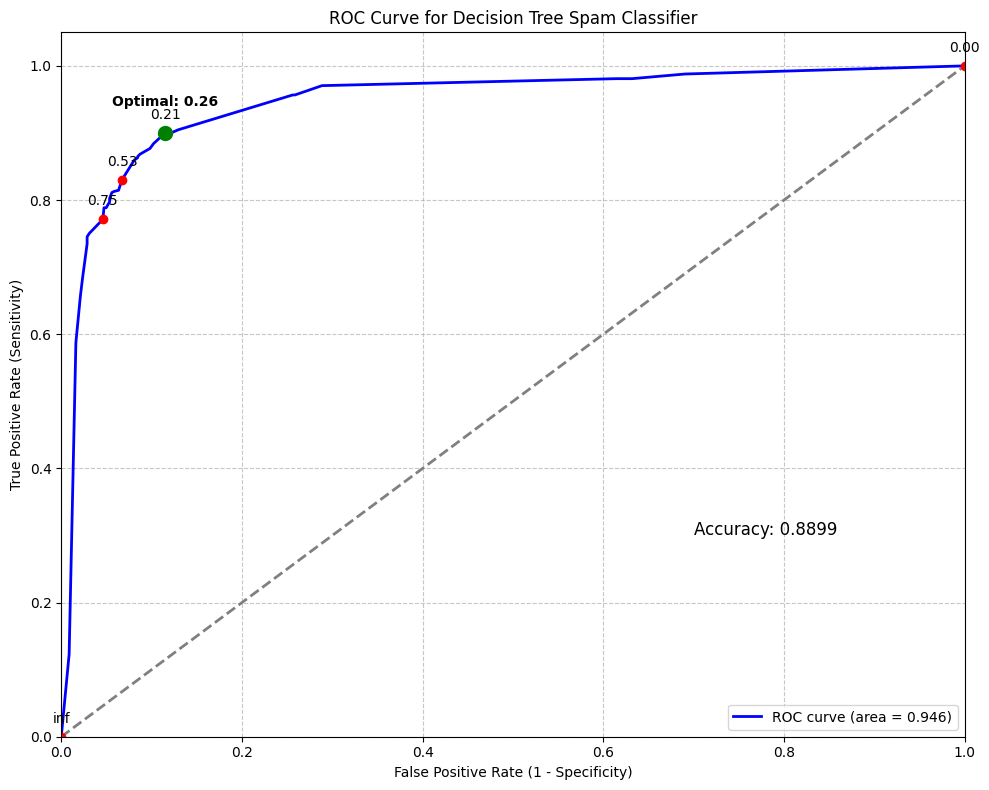

In [21]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', lw=2,
         label=f'ROC curve (area = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve for Decision Tree Spam Classifier')
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', alpha=0.7)

# Display your existing metrics on the plot
accuracy = accuracy_score(y_test, y_pred)
plt.text(0.7, 0.3, f'Accuracy: {accuracy:.4f}', fontsize=12)

# Mark a few threshold points on the curve
indices_to_mark = np.linspace(0, len(thresholds) - 1, 5).astype(int)
for i in indices_to_mark:
    threshold = thresholds[i]
    plt.plot(fpr[i], tpr[i], 'ro')
    plt.annotate(f"{threshold:.2f}", (fpr[i], tpr[i]),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center')

# Post-training: Find thresholds corresponding to point closest to top-left corner
optimal_idx = np.argmin(np.sqrt((1-tpr)**2 + fpr**2))
optimal_threshold = thresholds[optimal_idx]
plt.plot(fpr[optimal_idx], tpr[optimal_idx], 'go', markersize=10)
plt.annotate(f"Optimal: {optimal_threshold:.2f}",
             (fpr[optimal_idx], tpr[optimal_idx]),
             textcoords="offset points",
             xytext=(0,20),
             ha='center',
             fontweight='bold')

# Save and show plot
plt.tight_layout()
plt.savefig('decision_tree_roc_curve.png', dpi=300, bbox_inches='tight')
plt.show()
